<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_LEC_06_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Significance

1. Calculate and the test statistic for our sample,
compared to the assumed population mean of 1.61.
2. Determine and visualise the $p$ value for the test
statistic calculated in (1).
3. Can we reject the null hypothesis ($H_0$)?

Remember we are doing a one-tailed $t$-test that the true mean is *less than* 1.61. $(\mu < \mu_0)$

In [1]:
# Setup
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Let's read in our sample from earlier.
x <- c(1.61, 1.65, 1.45, 1.36, 2.12, 1.82, 1.54)

# Calculate our mean, standard deviation, and standard error of the mean:
x_bar <- mean(x)
s <- sd(x)
se_mean <- s/sqrt(length(x))

# Print our calculations:
x_bar; s; se_mean

[1] 1.65

[1] 0.2541653

[1] 0.09606545

In [3]:
# Our test statistic relies on the t distribution and some benchmark mean, mu0.
mu_0 <- 1.61
ts <- (x_bar - mu_0)/se_mean

# Print our calculation:
ts

[1] 0.4163828

In [4]:
# The p value we want to derive is the answer to the following question:
# "What is the probability of observing a result at least as extreme as the
# observed result if H_0 were true and we carried out the exact same experiment
# on another sample of the exact same size?"

# I.e., we want to know the probability of receiving a sample mean of 1.65 or
# less given our benchmark mean of 1.61.

?pt # function to estimate probability from a t distribution
# just like dnorm, pnorm, qnorm and rnorm there are dt, pt, qt and rt

In [5]:
# Find the probabilities using built-in distributions:
prob_ts <- pt(q = ts, lower.tail = TRUE, df = length(x) - 1)

# Print our calculation:
prob_ts

[1] 0.6541928

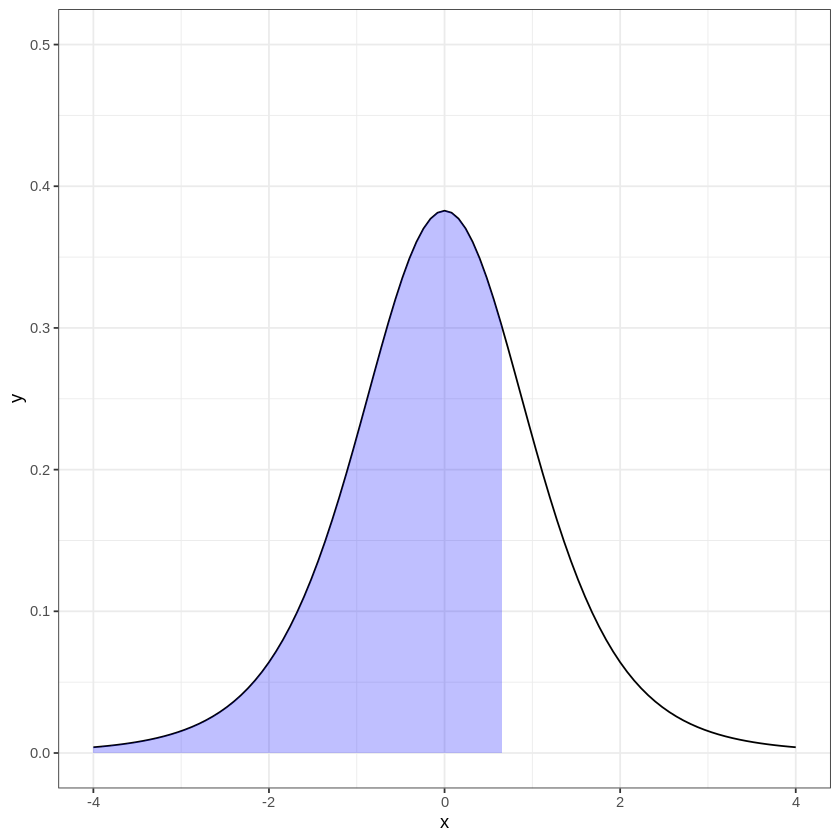

In [6]:
# So, the probability that we would observe something at least as extreme if we
# took another sample of the same size is 0.6542.

# Let's plot it:
ggplot(data = data.frame(x = c(-4, 4)), aes(x = x)) + # gives the data range
  stat_function(fun=dt, args=list(df = 6)) + # plots the t distribution
  ylim(c(0, 0.5)) + # resizes the y-axis
  stat_function(fun = dt, args = list(df=6), geom = "ribbon", # code to shade (extra)
                xlim=c(-4,prob_ts),
                aes(ymax=after_stat(y)), ymin=0, fill="blue", alpha=0.25) +
  theme_bw()

In [7]:
# Suggested "rejection benchmark" is 0.05, by R.A. Fisher.
# How does this 5% translate to our context? Let's calculate and plot it!
alpha <- 0.05

# The test statistic for this probability is given by:
ts_alpha <- qt(p = alpha, lower.tail = TRUE, df = length(x)-1)
ts_alpha

[1] -1.94318

In [8]:
# We can then calculate the mean that gives this probability by rearranging the
# test statistic equation:

# ts = (x_bar - mu_0)/se_mean
# ts*se_mean = x_bar - mu_0
# ts*se_mean + mu_0 = x_bar
mu_alpha <- ts_alpha*se_mean + mu_0
mu_alpha

[1] 1.423328

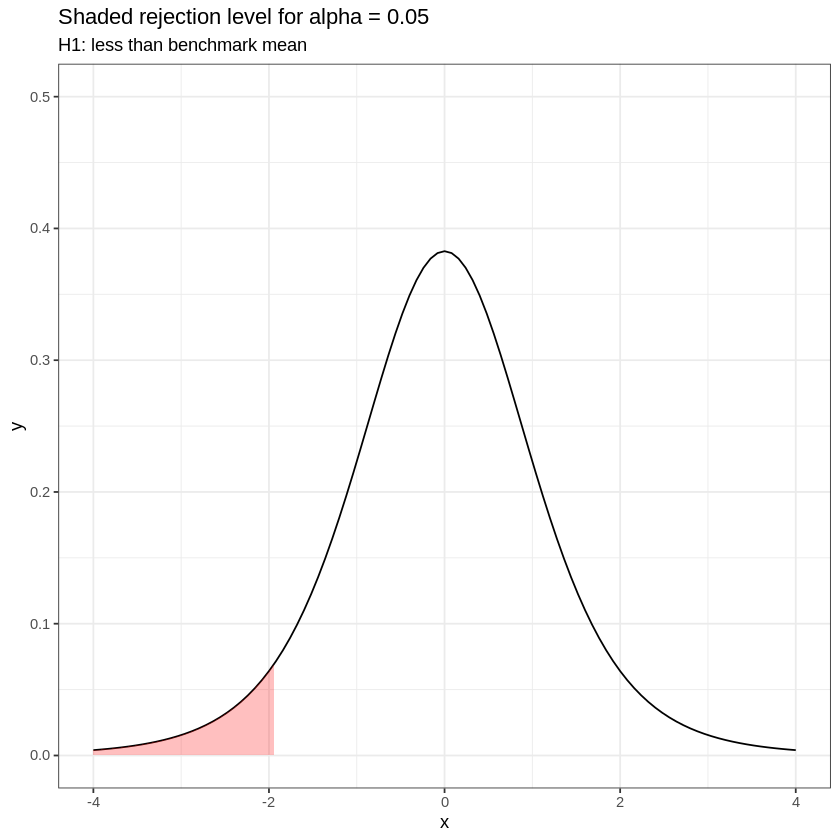

In [9]:
# let's plot our rejection region
ggplot(data = data.frame(x = c(-4, 4)), aes(x = x)) + # gives the data range
  stat_function(fun=dt, args=list(df = 6)) + # plots the t distribution
  ylim(c(0, 0.5)) + # resizes the y-axis
  stat_function(fun = dt, args = list(df=6), geom = "ribbon", # code to shade (extra)
                xlim=c(-4, ts_alpha),
                aes(ymax=after_stat(y)), ymin=0, fill="red", alpha=0.25) +
  theme_bw() +
  ggtitle("Shaded rejection level for alpha = 0.05", "H1: less than benchmark mean")

In [13]:
# Our x_bar is not less than or equal to mu_alpha, so we do not have enough
# evidence to reject our null hypothesis.

# That is, as far as we can tell, this group's mean is at the guideline.

# BE CAREFUL OF THE LANGUAGE YOU USE TO DESCRIBE P VALUES!

# Alternatively, you can use the following to perform a one-sided t-test
t.test(x = x, alternative = "less", mu = mu_0)


	One Sample t-test

data:  x
t = 0.41638, df = 6, p-value = 0.6542
alternative hypothesis: true mean is less than 1.61
95 percent confidence interval:
     -Inf 1.836672
sample estimates:
mean of x 
     1.65 


In [14]:
# looking for all the statistical analysis in base R? Try:
library(help = "stats")

# Confidence Intervals
1. Rearrange the critical region expressionto derive $L$ and $U$.
2. Calculate the $p$ quantiles of our $t(\nu)$ distribution
using the `qt()` function.
3. Visualise and summarise the resulting confidence
interval.


Rearranging standardised confidence intervals:

$$
t_{0.025}(n-1) \leq \frac{\overline{x} - \mu}{s / \sqrt{n}} \leq t_{0.975}(n-1)
$$

multiplying through by $s / \sqrt{n}$ we obtain:

$$
t_{0.025}(n-1) \frac{s}{\sqrt{n}} \leq \overline{x} - \mu \leq t_{0.975}(n-1)\frac{s}{\sqrt{n}}
$$

subtracting $\overline{x}$:

$$
 t_{0.025}(n-1)\frac{s}{\sqrt{n}} - \overline{x} \leq -\mu \leq   t_{0.975}(n-1)\frac{s}{\sqrt{n}} - \overline{x}  
$$

multiplying through by $-1$ flips the signs:

$$
 \overline{x} - t_{0.025}(n-1)\frac{s}{\sqrt{n}} \geq \mu \geq \overline{x} - t_{0.975}(n-1)\frac{s}{\sqrt{n}}
$$

or more conventionally:

$$
\overline{x} - t_{0.975}(n-1)\frac{s}{\sqrt{n}} \leq \mu \leq \overline{x} - t_{0.025}(n-1)\frac{s}{\sqrt{n}}
$$

We also know that because of symmetry:

$$
  -t_{0.025}(n-1) = t_{0.975}(n-1)
$$

so we can rewrite out confidence intervals:

$$
\overline{x} + t_{0.025}(n-1)\frac{s}{\sqrt{n}} \leq \mu \leq \overline{x} + t_{0.975}(n-1)\frac{s}{\sqrt{n}}
$$

We typically see confidence intervals written as:

$$
\overline{x} \pm t_{1-\alpha/2}(\nu) ⋅ \text{se}_{\bar{x}},
$$
where $\nu$ is the degrees of freedom, and $\alpha$ is the significance level.

So a 95% confidence interval for a sample mean would be:

$$
\overline{x} \pm t_{0.975}(n-1) ⋅ (s/\sqrt{n})
$$

Or as *some observed value is $\bar{x}$ (95% CI=U,L)*.

In [15]:
# We are interested in the quantiles of a t(6).
qt(p=c(0.025, 0.975), df=6)
L <- x_bar + qt(p=0.025, df=6)*s/sqrt(7)
L
U <- x_bar + qt(p=0.975, df=6)*s/sqrt(7)
U
# quantiles in t are symetric, so could use
L <- x_bar - qt(p=0.975, df=6)*s/sqrt(7); L
U <- x_bar - qt(p=0.025, df=6)*s/sqrt(7); U


[1] -2.446912  2.446912

[1] 1.414936

[1] 1.885064

[1] 1.414936

[1] 1.885064

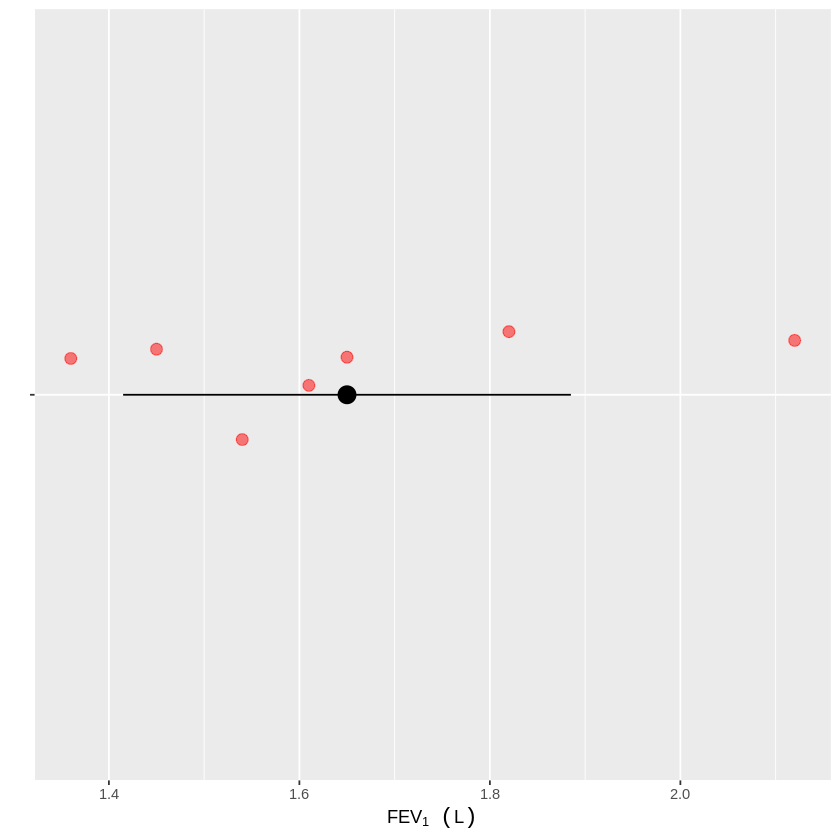

In [16]:
# Visualise:
ggplot(data=data.frame(x=factor(0), y=x), aes(x=x, y=y)) +
  geom_point(alpha=0.5, colour="red", size = 3, position=position_jitter(h=0, w=0.1)) +
  geom_pointrange(data=data.frame(L=L, U=U, y=x_bar, x=factor(0)),
                  aes(ymin=L, ymax=U, y=y), size = 1) +
  coord_flip() +
  xlab(" ") +
  ylab(expression(FEV[1]~(L))) +
  theme(axis.text.y=element_blank())

# Confidence Interval Examples


In [17]:
# Example 1:
# Sample the pH of a creek 9 times.
#   x_bar = 6.5
#   s = 1.2
#   With alpha = 0.05, does the creek have a mean pH of 7 (neutral)?

# H0: The creek has a pH of 7.
# H1: The creek does not have a pH of 7.
t.s. <- (6.5 - 7)/(1.2/sqrt(9))
t.s.

[1] -1.25

In [18]:
# calculate p-value

p <- pt(t.s., df = 8, lower.tail = T) +
    pt(-t.s., df = 8, lower.tail = F)
p



[1] 0.2466259

In [19]:
# prompt: perform a t-test with mean 6.5, assumed mean 7, s=1.2 and n=9

?t.test(x = 6.5, mu = 7, s = 1.2, n = 9, alternative = "two.sided")

# to do the test you need the data

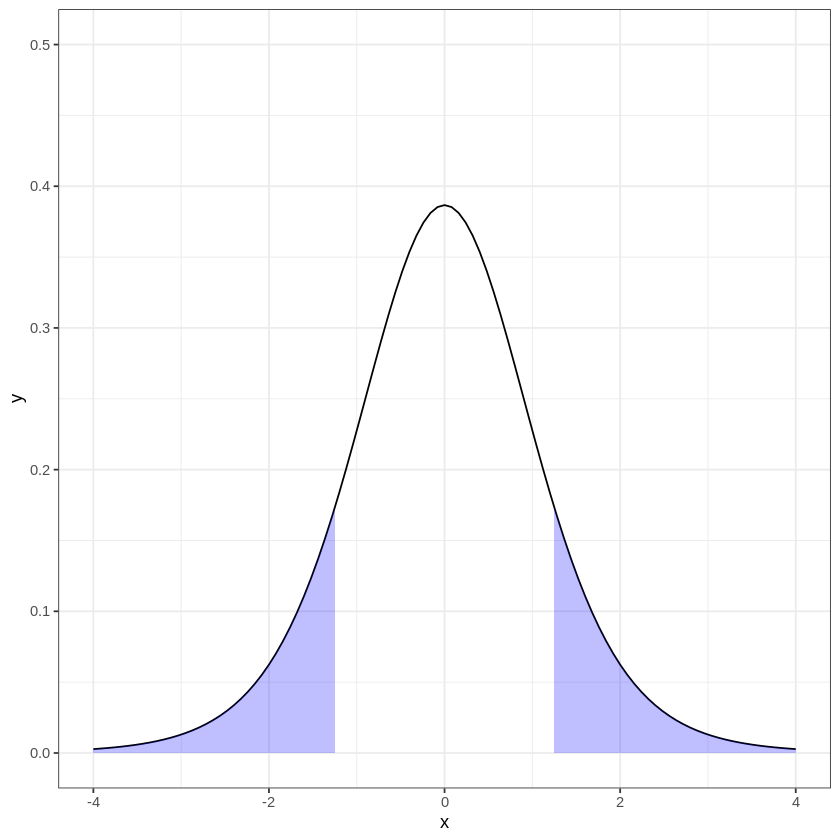

In [21]:

# p > 0.05, so there is insufficient evidence to reject the null hypothesis that
# the creek's pH differs from 7.

# A quick visual:
ggplot(data=data.frame(x=c(-4, 4)), aes(x=x)) +
  stat_function(fun=dt, args=list(df=8)) +
  ylim(c(0, 0.5)) +
  stat_function(fun=dt, args=list(df=8), geom="ribbon",
                xlim=c(-4,t.s.), aes(ymax=after_stat(y)), ymin=0,
                fill="blue", alpha=0.25)+
  stat_function(fun=dt, args=list(df=8), geom="ribbon",
                xlim=c(-t.s.,4), aes(ymax=after_stat(y)), ymin=0,
                fill="blue", alpha=0.25)+
  theme_bw()


In [22]:
# Example 2:
# Sample 20 rockpools at a beach
#    Mean population density of anurida maritima is 300 individuals/m^2.
#    Standard deviation is 50 individuals/m^2.
#    What is a 90% confidence interval for the mean population density in
#    rockpools at this beach?

qt(p = c(0.05,0.95), df = 20-1)
L <- 200 + qt(p = 0.05, df = 19)*50/sqrt(20)
L
U <- 200 + qt(p = 0.95, df = 19)*50/sqrt(20)
U

# Confidence interval for the sample is (180.6677, 219.3323)

[1] -1.729133  1.729133

[1] 180.6677

[1] 219.3323

In [23]:
# Example 3:
# 31 groups of students measuring the speed of light in a vacuum
#   mean measured speed 2.981 * 10^8m/s
#   standard deviation 0.0006 * 10^8m/s
#   Are the results consistent with the established value of c of
#   2.9979 * 10^8m/s with alpha = 0.01?
#   Calculate a 99% CI for c based on these results.

# H_0 : The speed of light measured by students is consistent with the
#       established value.
# H_1 : The speed of light measured by students is not consistent with the
#       established value.

t.s. <- (2.981*10^8 - 2.9979*10^8)/(0.0006*10^8/sqrt(31))
t.s.
p <- pt(t.s., df = 30, lower.tail = T) +
    pt(-t.s., df = 30, lower.tail = F)
p


[1] -156.8254

[1] 2.795101e-45

In [24]:

# At a significance level of - = 0.01 there is significant evidence against the
# null hypothesis in favour of the alternative hypothesis.

qt(p = c(0.005,0.995),df = 31-1)

L <- 2.981*10^8 + qt(p = 0.005, df = 30)*0.0006*10^8/sqrt(31)
L
U <- 2.981*10^8 + qt(p = 0.995, df = 30)*0.0006*10^8/sqrt(31)
U

# Confidence interval for the sample is (298070365, 298129635)

[1] -2.749996  2.749996

[1] 298070365

[1] 298129635

# Demonstrations
- CLT
  - https://stats.libretexts.org/Learning_Objects/02%3A_Interactive_Statistics/15%3A_Discover_the_Central_Limit_Theorem_Activity
- CI
  - https://seeing-theory.brown.edu/frequentist-inference/index.html#section2
- Significance testing
  - https://www.tylervigen.com/spurious/correlation/2733_the-distance-between-jupiter-and-the-sun_correlates-with_the-number-of-secretaries-in-alaska
  - https://www.tylervigen.com/spurious/correlation/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine
  

## Evidence of replication problems in different areas of science

Field|Estimated replication success rate
---|---
Medicine| 59% (n = 34)
Psychology| 36% (n = 97)
Social science| 62% (n = 21)
Preclinical cancer studies| 11% (n = 53)
Preclinical pharmacology studies| < 50% (n > 100)
Economics| 61% (n = 18)

Wagenmakers, E. J. (2021). Bernoulli’s Fallacy. CHANCE, 34(4), 37–38. https://doi.org/10.1080/09332480.2021.2003642